In [1]:
print("Chapter 2. End to End Machine Learning Project")

Chapter 2. End to End Machine Learning Project


In [8]:
# Function to get data
import os
import tarfile
import urllib

import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [16]:
# fetch_housing_data()
housing_data = load_housing_data()
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


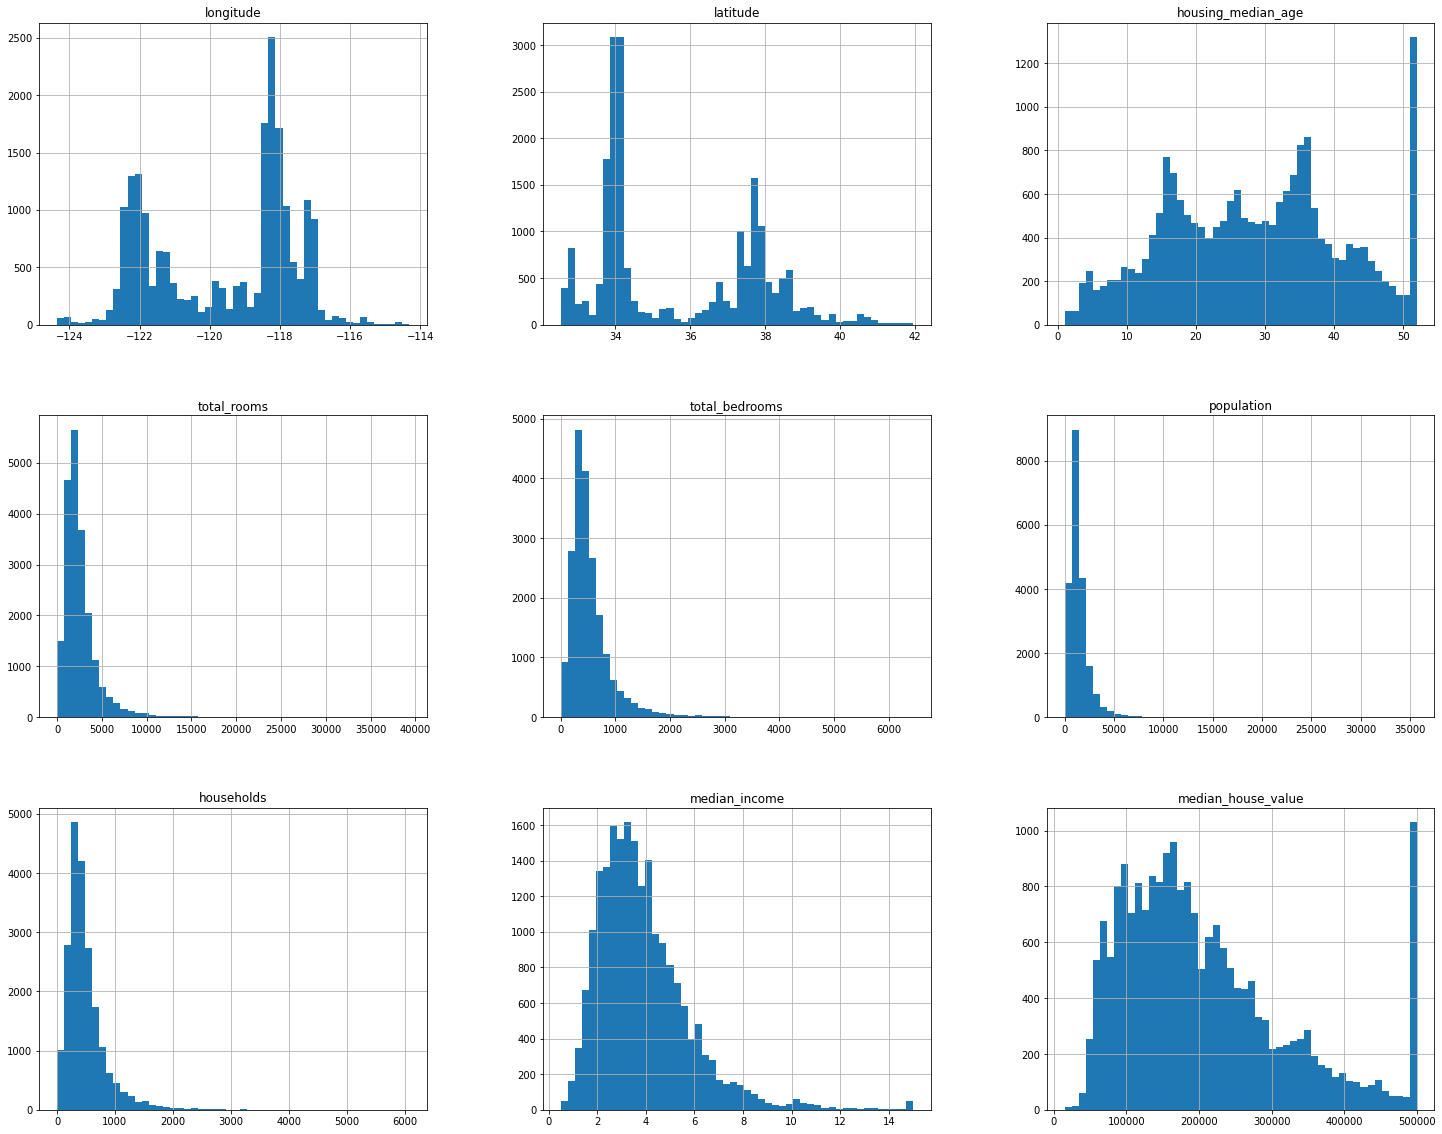

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(25,20))
plt.show()

In [24]:
# create test set
import numpy as np

def split_train_test(data=housing_data, test_ratio=0.2):
    data_size = len(data)
    shuffled_indices = np.random.permutation(data_size)
    test_set_size = int(data_size * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
# hash based split
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identified)) & 0xffffffff < test_ratio * (2 **32)

def split_train_test_by_id(data=housing_data, test_ratio=0.2, id_column='index'):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.iloc[~in_test_set], data.loc[in_test_set]

In [34]:
# sklearn random sampler
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42) #seed 42

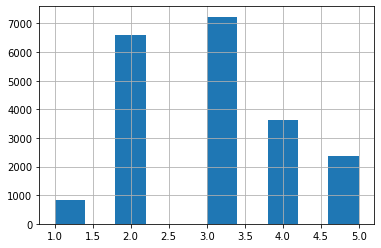

In [39]:
# stratified sampling with median_income
median_income_bins = pd.cut(housing_data["median_income"],
                            bins=[0., 1.5, 3., 4.5, 6., np.inf], 
                            labels=[1, 2, 3, 4, 5])
median_income_bins.hist()
housing_data["income_cat"] = median_income_bins

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)